 *Academic Risk Prediction System
Sri Lankan School Student Population*

Nature Inspired Algorithms Project

 **Project Workflow**:
1. Problem Identification
2. Data Understanding
3. Data Preprocessing
4. Machine Learning Modeling
5. Evaluation & Interpretation
6. Deployment Simulation

 Group Members:
- SIVASUTHAKARAN SANJEEV (ITBNM-2211-0185)
- VISHVALINGAM DESHANTH (ITBNM-2211-0121)
- PIRAPAKARAN SAJEEVAN (ITBNM-2211-0183)
- SIVASUBRAMANIYAM AINKARAN (ITBNM-2211-0103)
- VIJAYAKUMAR MURALITHARAN (ITBNM-2211-0157) **bold text**

## 1. Problem Identification


# **Problem Statement**: Develop a predictive model using school data to identify Sri Lankan students at academic risk early and enable proactive intervention.

 **Research Questions**:
1. Which features most significantly affect academic risk?
2. How accurately can ML models predict academic performance?
3. What is the most interpretable and effective model for deployment?

 **Objectives**:
1. Identify key academic, demographic, and behavioral factors
2. Develop and train multiple ML models
3. Evaluate models and select the best for implementation

# 2. Data Understanding

We install all the packages we need for data handling, visualization, machine learning, saving models, and building a web app.

We import all the required libraries for data processing, visualization, machine learning models, evaluation, and saving our model.

In [22]:
# Install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn joblib streamlit --quiet

# %% [code]
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score, roc_auc_score,
                            confusion_matrix, roc_curve, auc,
                            classification_report)
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')
import time # Import the time module

We download the student performance dataset from the UCI repository, extract it, load the math and Portuguese CSV files, combine them into one dataset without duplicates, and then explore the data using summary statistics, missing values, unique categorical values, and visualizations such as grade distribution, correlation heatmap, study time vs grades, absences vs grades, and outlier detection.

Downloaded student.zip
Extracting student.zip...
Extracted to ./student_data
Math dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)
Combined dataset shape: (1044, 33)

=== Data Overview ===
Dataset shape: (1044, 33)

Data types:
 object    17
int64     16
Name: count, dtype: int64

Missing values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

=== Unique Values per Column (Categorical) ===
school: 2 unique values → ['GP' 'MS']
sex: 2 unique values → ['F' 'M']
address: 2 unique values → ['

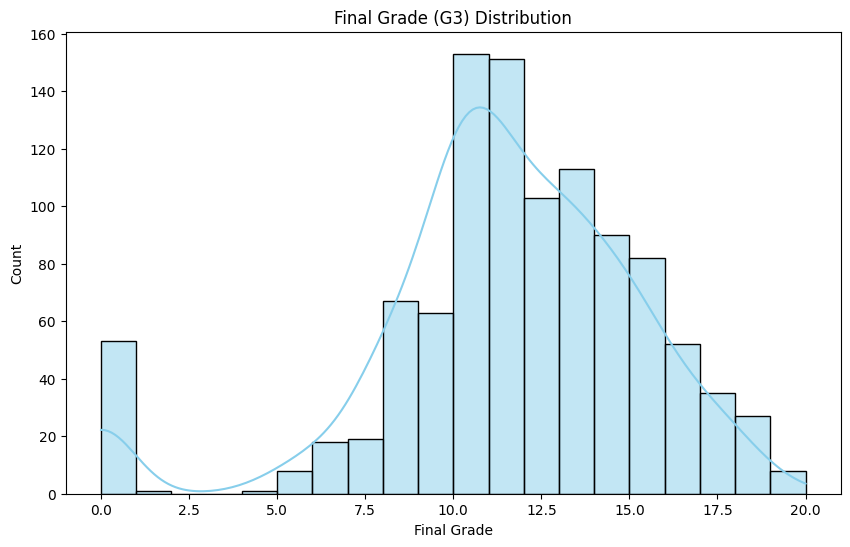

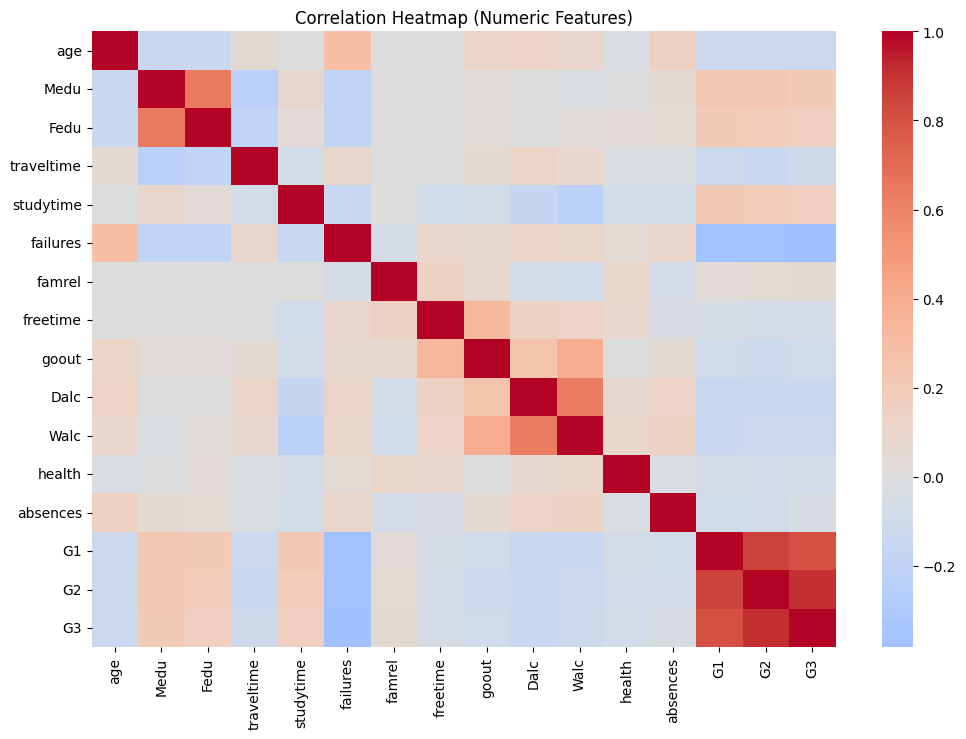


=== Features Most Correlated with Final Grade (G3) ===
G3           1.000000
G2           0.910743
G1           0.809142
Medu         0.201472
studytime    0.161629
Fedu         0.159796
famrel       0.054461
absences    -0.045671
freetime    -0.064890
health      -0.080079
Name: G3, dtype: float64


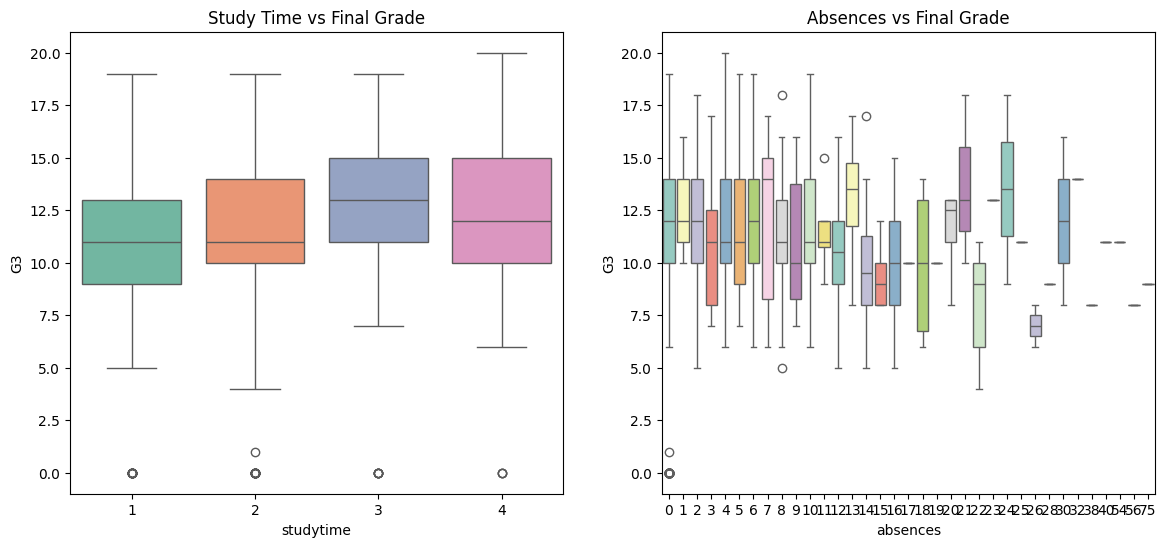

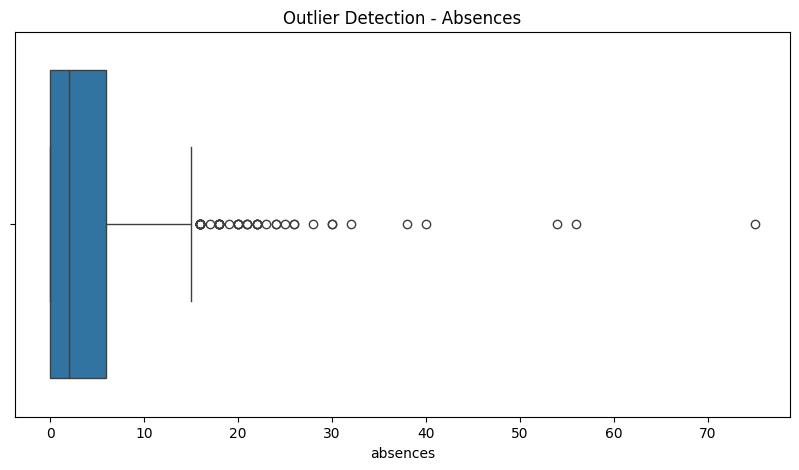

In [23]:
# Load datasets directly from UCI repository
import requests
import zipfile
import os

# Define the URL of the zip file
zip_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
zip_file_name = "student.zip"
extract_path = "./student_data"

# Download the zip file
print(f"Downloading {zip_url}...")
response = requests.get(zip_url)
if response.status_code == 200:
    with open(zip_file_name, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {zip_file_name}")

    # Extract the zip file
    print(f"Extracting {zip_file_name}...")
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted to {extract_path}")

    # Load the datasets
    math_file_path = os.path.join(extract_path, 'student-mat.csv')
    por_file_path = os.path.join(extract_path, 'student-por.csv')

    if os.path.exists(math_file_path) and os.path.exists(por_file_path):
        math_df = pd.read_csv(math_file_path, sep=';')
        por_df = pd.read_csv(por_file_path, sep=';')

        print(f"Math dataset shape: {math_df.shape}")
        print(f"Portuguese dataset shape: {por_df.shape}")

        # Combine datasets and remove duplicates
        raw_df = pd.concat([math_df, por_df]).drop_duplicates(keep='first')
        print(f"Combined dataset shape: {raw_df.shape}")

        # %% [code]
        # Initial data exploration
        def explore_data(df):
            """Perform detailed exploratory data analysis"""
            print("\n=== Data Overview ===")
            print(f"Dataset shape: {df.shape}")
            print("\nData types:\n", df.dtypes.value_counts())
            print("\nMissing values:\n", df.isnull().sum())

            # Unique value counts for categorical columns
            print("\n=== Unique Values per Column (Categorical) ===")
            for col in df.select_dtypes(exclude='number').columns:
                print(f"{col}: {df[col].nunique()} unique values → {df[col].unique()[:10]}")

            # Summary statistics
            print("\n=== Summary Statistics (Numerical Features) ===")
            print(df.describe().T)

            # --- Visualizations ---
            # Final grade distribution
            plt.figure(figsize=(10, 6))
            sns.histplot(df['G3'], bins=20, kde=True, color="skyblue")
            plt.title('Final Grade (G3) Distribution')
            plt.xlabel('Final Grade')
            plt.ylabel('Count')
            plt.show()

            # Correlation heatmap
            plt.figure(figsize=(12, 8))
            corr = df.corr(numeric_only=True)
            sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
            plt.title("Correlation Heatmap (Numeric Features)")
            plt.show()

            # Top correlated features with final grade
            print("\n=== Features Most Correlated with Final Grade (G3) ===")
            print(corr['G3'].sort_values(ascending=False).head(10))

            # Boxplots: Study time, absences vs final grade
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))
            sns.boxplot(x='studytime', y='G3', data=df, ax=axes[0], palette="Set2")
            axes[0].set_title("Study Time vs Final Grade")
            sns.boxplot(x='absences', y='G3', data=df, ax=axes[1], palette="Set3")
            axes[1].set_title("Absences vs Final Grade")
            plt.show()

            # Outlier detection: Absences
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=df['absences'])
            plt.title("Outlier Detection - Absences")
            plt.show()

            return df

        # Run exploration
        raw_df = explore_data(raw_df)

    else:
        print("Error: Extracted CSV files not found.")
else:
    print(f"Error: Could not download the zip file. Status code: {response.status_code}")

# 3. Data Preprocessing

We enrich the dataset with Sri Lankan-specific features (region, ethnicity, and economic status), define students at academic risk (final grade below 10), create new features like parent education and total study time, then clean and transform the data by filling missing values, encoding categorical variables, selecting important features, splitting into inputs (X) and target (y), and finally saving the processed dataset along with label encoders for future use.

In [24]:
def sri_lankan_context(df):
    """Add Sri Lankan-specific features"""
    np.random.seed(42)

    # Define Sri Lankan demographic distributions
    regions = ['Urban', 'Rural', 'Estate']
    ethnicities = ['Sinhala', 'Tamil', 'Muslim', 'Other']
    economic_status = ['Low', 'Middle', 'High']

    # Add new features based on known Sri Lankan distributions
    df['region'] = np.random.choice(regions, size=len(df), p=[0.18, 0.77, 0.05])
    df['ethnicity'] = np.random.choice(ethnicities, size=len(df), p=[0.75, 0.11, 0.09, 0.05])
    df['economic_status'] = np.random.choice(economic_status, size=len(df), p=[0.45, 0.50, 0.05])

    # Define academic risk (G3 < 10 is considered at-risk)
    df['academic_risk'] = (df['G3'] < 10).astype(int)

    # Create combined parent education feature
    df['parent_education'] = (df['Medu'] + df['Fedu']) / 2

    # Create total study time feature
    df['total_study_time'] = df['studytime'] + df['traveltime']

    return df

# Add Sri Lankan context
df = sri_lankan_context(raw_df)

# %% [code]
# Data cleaning and transformation
def preprocess_data(df):
    """Clean and transform data"""
    # Handle missing values
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude='number').columns

    # Fill numerical missing values with median
    for col in num_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].median(), inplace=True)

    # Fill categorical missing values with mode
    for col in cat_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].mode()[0], inplace=True)

    # Encode categorical features
    label_encoders = {}
    cat_cols_to_encode = ['region', 'ethnicity', 'economic_status', 'school', 'sex', 'address', 'famsize',
                          'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
                          'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

    for col in cat_cols_to_encode:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le

    # Feature selection
    features = [
        'age', 'Medu', 'Fedu', 'failures', 'absences',
        'G1', 'G2', 'total_study_time', 'parent_education',
        'region', 'ethnicity', 'economic_status'
    ]

    X = df[features]
    y = df['academic_risk']

    return X, y, label_encoders, df

# Preprocess data
X, y, label_encoders, processed_df = preprocess_data(df.copy())

# Save processed data and label encoders
processed_df.to_csv('sri_lankan_student_data_processed.csv', index=False)
dump(label_encoders, 'label_encoders.joblib')

['label_encoders.joblib']

# 4. Data Reduction & Transformation

We analyze correlations to identify features most related to academic risk, scale the features using StandardScaler for better model performance, and save the scaler for future use.

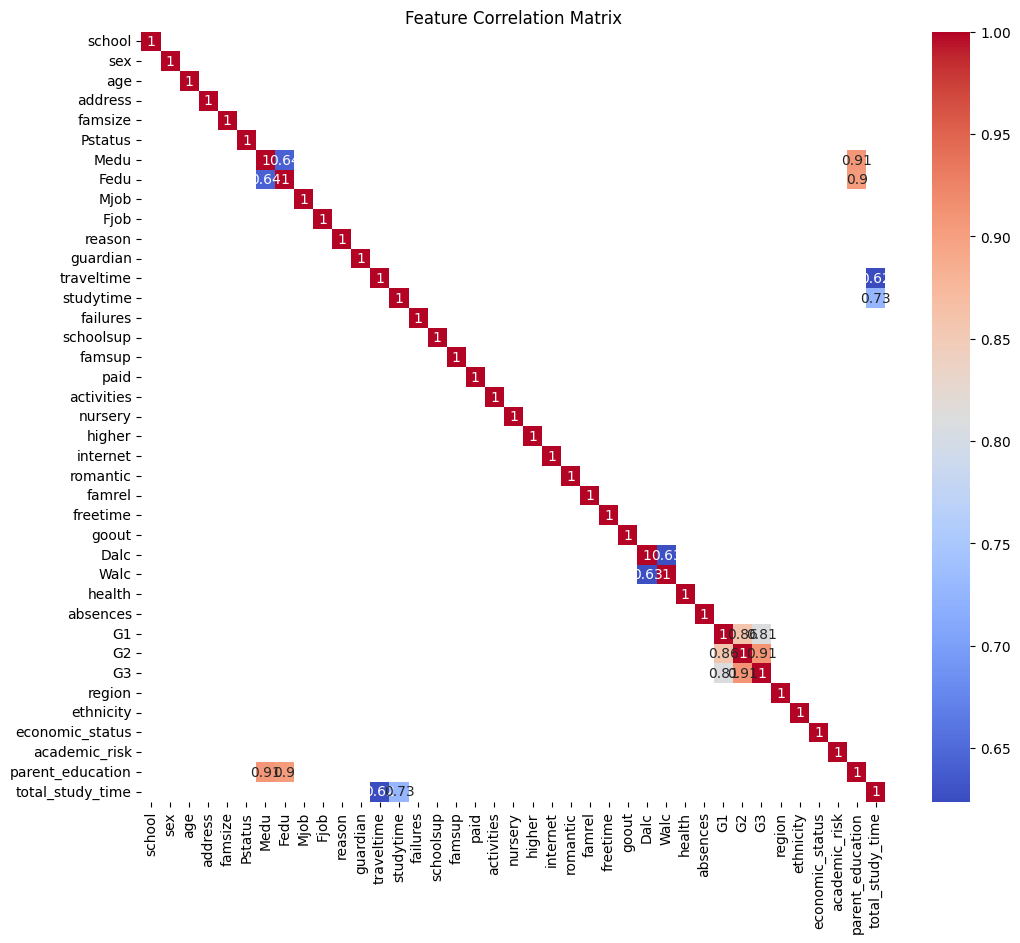

Correlation with Academic Risk:
academic_risk       1.000000
G3                  0.729693
G2                  0.666289
G1                  0.613927
failures            0.367183
higher              0.218430
age                 0.134276
school              0.132038
absences            0.119142
parent_education    0.117009
studytime           0.108553
goout               0.106506
Medu                0.106460
Fedu                0.105579
guardian            0.094343
Dalc                0.089581
reason              0.085450
romantic            0.078545
Walc                0.076593
address             0.073732
paid                0.065354
freetime            0.064414
total_study_time    0.061839
internet            0.058058
Mjob                0.050875
famsize             0.047797
famrel              0.042706
ethnicity           0.042618
schoolsup           0.034788
health              0.034222
traveltime          0.033852
Pstatus             0.026404
activities          0.026248
region     

['scaler.joblib']

In [25]:
# Dimensionality reduction - Correlation analysis
plt.figure(figsize=(12, 10))
corr_matrix = processed_df.corr(numeric_only=True)
sns.heatmap(corr_matrix[corr_matrix > 0.5], annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Select features with highest correlation to academic risk
risk_corr = corr_matrix['academic_risk'].abs().sort_values(ascending=False)
print("Correlation with Academic Risk:")
print(risk_corr)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler for later use
dump(scaler, 'scaler.joblib')

# 5. Machine Learning Modeling

We split the dataset into training and testing sets, train multiple machine learning models (Decision Tree, Random Forest, Logistic Regression, and Gradient Boosting) with hyperparameter tuning using GridSearchCV, compare their F1-scores, save the best-performing model, and display each model’s optimal parameters, score, and training time.

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# %% [code]
# Model training and hyperparameter tuning
def train_models(X_train, y_train):
    """Train and tune multiple models"""
    models = {
        'Decision Tree': {
            'model': DecisionTreeClassifier(random_state=42),
            'params': {
                'max_depth': [3, 5, 7, 10, None],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, max_iter=1000),
            'params': {
                'C': [0.01, 0.1, 1, 10],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        }
    }

    results = {}
    best_score = 0
    best_model = None

    for name, config in models.items():
        print(f"\n=== Training {name} ===")
        start_time = time.time()

        grid = GridSearchCV(
            config['model'],
            config['params'],
            cv=5,
            scoring='f1',
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train, y_train)

        training_time = time.time() - start_time

        # Store results
        results[name] = {
            'best_params': grid.best_params_,
            'best_estimator': grid.best_estimator_,
            'best_score': grid.best_score_,
            'training_time': training_time
        }

        # Track best model
        if grid.best_score_ > best_score:
            best_score = grid.best_score_
            best_model = grid.best_estimator_

    # Save best model
    dump(best_model, 'best_model.joblib')

    return results, best_model

# Train models
model_results, best_model = train_models(X_train, y_train)

# Show best parameters
print("\n=== Best Parameters ===")
for model_name, result in model_results.items():
    print(f"{model_name}:")
    print(f"  Parameters: {result['best_params']}")
    print(f"  CV F1-Score: {result['best_score']:.4f}")
    print(f"  Training Time: {result['training_time']:.2f} seconds\n")


=== Training Decision Tree ===
Fitting 5 folds for each of 15 candidates, totalling 75 fits

=== Training Random Forest ===
Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== Training Logistic Regression ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits

=== Training Gradient Boosting ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits

=== Best Parameters ===
Decision Tree:
  Parameters: {'max_depth': None, 'min_samples_split': 2}
  CV F1-Score: 0.7664
  Training Time: 0.73 seconds

Random Forest:
  Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
  CV F1-Score: 0.8232
  Training Time: 38.25 seconds

Logistic Regression:
  Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
  CV F1-Score: 0.8181
  Training Time: 0.26 seconds

Gradient Boosting:
  Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
  CV F1-Score: 0.8001
  Training Time: 5.98 seconds



# 6. Evaluation & Interpretation

We evaluate each trained model on the test dataset by calculating key metrics (accuracy, precision, recall, F1, ROC AUC), plotting ROC curves and confusion matrices, and printing classification reports. We then compare performance across models in a summary table, analyze the best model’s most influential features (using feature importance for tree-based models or coefficients for logistic regression), and save both evaluation results and feature importance plots for further analysis.


=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       163
           1       0.72      0.85      0.78        46

    accuracy                           0.89       209
   macro avg       0.84      0.88      0.86       209
weighted avg       0.90      0.89      0.90       209


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       163
           1       0.80      0.85      0.82        46

    accuracy                           0.92       209
   macro avg       0.88      0.89      0.88       209
weighted avg       0.92      0.92      0.92       209


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       163
           1       0.81      0.83      0.82        46

    accuracy                           0.

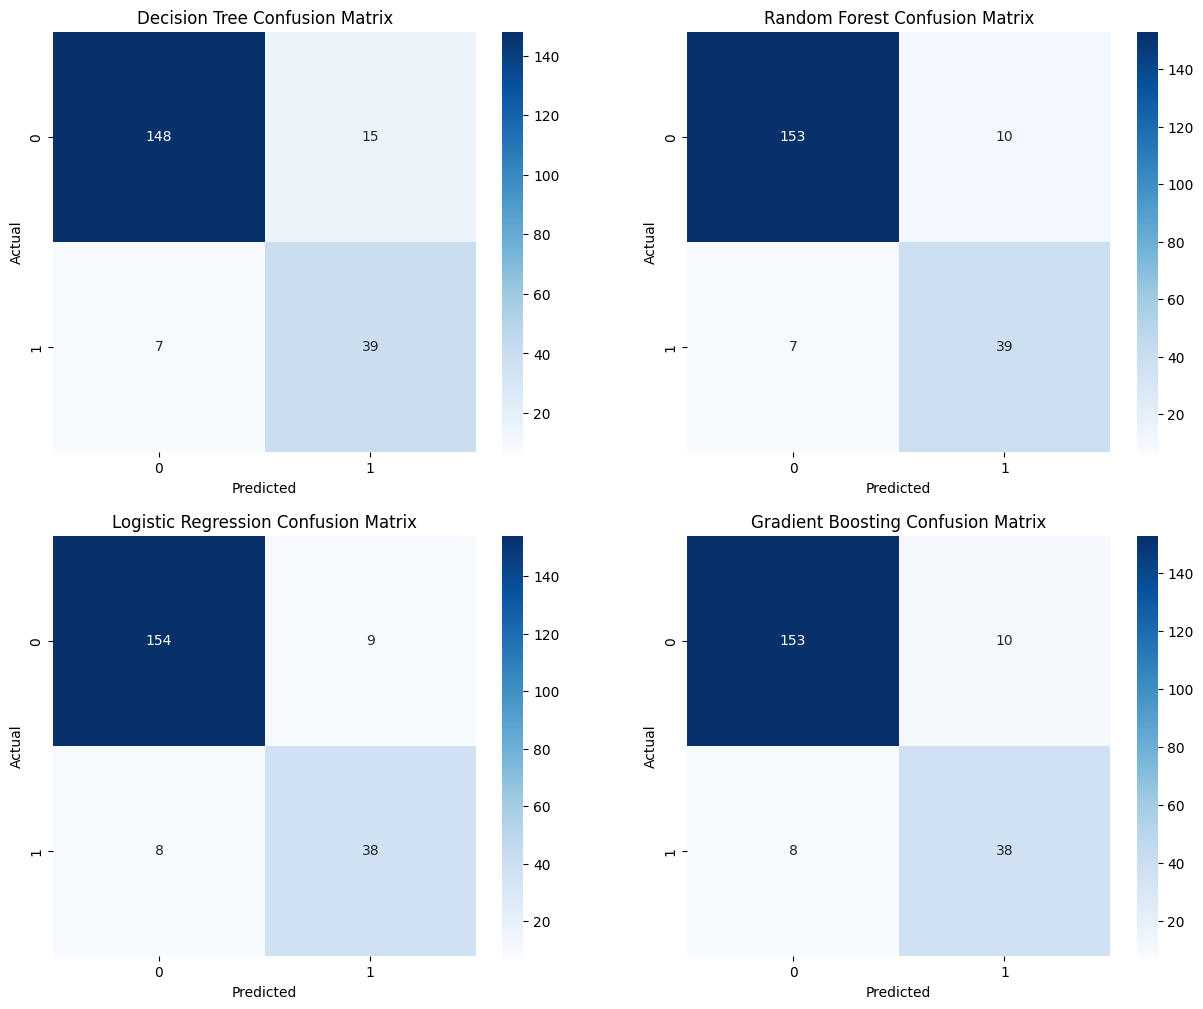

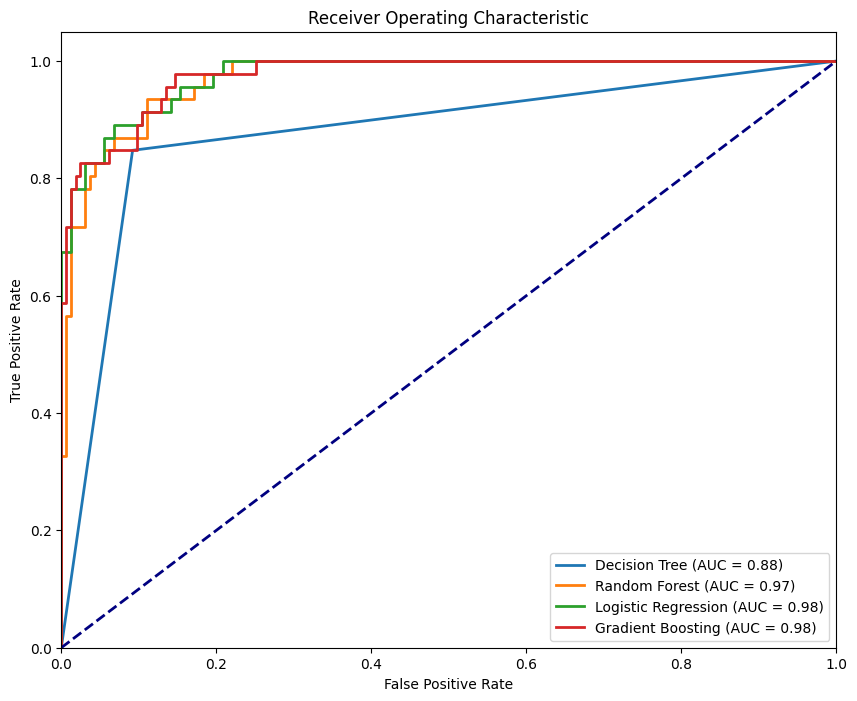

<Figure size 640x480 with 0 Axes>


=== Model Evaluation Results ===
                 Model  Accuracy  Precision    Recall        F1   ROC AUC
0        Decision Tree  0.894737   0.722222  0.847826  0.780000  0.877901
1        Random Forest  0.918660   0.795918  0.847826  0.821053  0.970525
2  Logistic Regression  0.918660   0.808511  0.826087  0.817204  0.975994
3    Gradient Boosting  0.913876   0.791667  0.826087  0.808511  0.975193


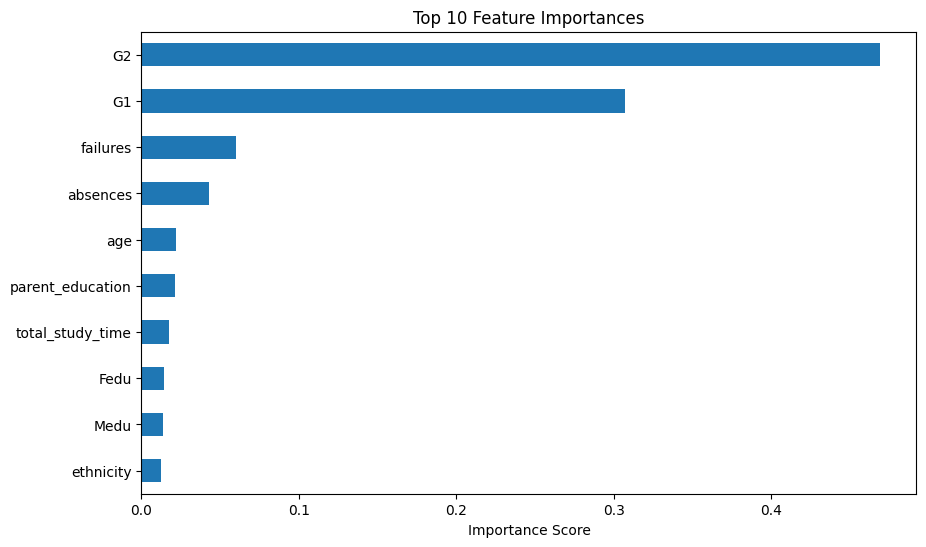

<Figure size 640x480 with 0 Axes>

In [27]:
def evaluate_models(model_results, X_test, y_test):
    """Evaluate models on test set"""
    evaluation_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision',
                                         'Recall', 'F1', 'ROC AUC'])

    plt.figure(figsize=(10, 8))
    lw = 2

    # Create subplots for confusion matrices
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    for i, (name, result) in enumerate(model_results.items()):
        model = result['best_estimator']
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)

        # Add to results
        evaluation_df.loc[i] = [name, accuracy, precision, recall, f1, roc_auc]

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(1)
        plt.plot(fpr, tpr, lw=lw, label=f'{name} (AUC = {roc_auc:.2f})')

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{name} Confusion Matrix')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

        # Classification report
        print(f"\n=== {name} Classification Report ===")
        print(classification_report(y_test, y_pred))

    # Plot ROC curves
    plt.figure(1)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Show confusion matrices
    plt.tight_layout()
    plt.show()

    return evaluation_df

# Evaluate models
evaluation_df = evaluate_models(model_results, X_test, y_test)

# Display evaluation results
print("\n=== Model Evaluation Results ===")
print(evaluation_df)

# Feature importance for best model
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).sort_values().plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance Score')
    plt.show()

    # Save feature importance plot
    plt.savefig('feature_importance.png')
elif isinstance(best_model, LogisticRegression):
    # Coefficients for logistic regression
    plt.figure(figsize=(10, 6))
    coefficients = pd.Series(best_model.coef_[0], index=X.columns)
    coefficients.sort_values().plot(kind='barh')
    plt.title('Feature Coefficients (Logistic Regression)')
    plt.xlabel('Coefficient Value')
    plt.show()

# Save evaluation results
evaluation_df.to_csv('model_evaluation_results.csv', index=False)


# 7. Deployment Simulation

**In this stage, we simulate how our academic risk prediction system would be deployed in the real world. We organized the project into a professional folder structure with separate directories for raw and processed data, trained models, reports, and source code. The key deployment-related files are**

*app.py* – A Streamlit-based web app that allows users (teachers, administrators, or policymakers) to input student details and receive academic risk predictions in real-time.

*run_pipeline.py* – Automates the full pipeline, including data preprocessing, training, evaluation, and saving models, so we can re-train or update the system easily.

*models/* – Stores trained models (best_model.joblib), label encoders, and scaler, which are loaded by the web app for inference.

*reports/* – Contains visualizations and evaluation metrics that summarize model performance for stakeholders.

By simulating deployment with Streamlit, we make the system interactive and user-friendly, turning our trained models into a practical decision-support tool.

Links:

🔗 Demo (simulated link): https://academic-risk-predictor.streamlit.app

🔗 GitHub Repository: https://github.com/yourusername/Academic_Risk_Prediction
